In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import statsmodels.api as sm

In [2]:
df = pd.read_csv('../data/hsb2.csv', index_col=0)
df['honcomp'] = 0

for key in df.index.values:
    if df.loc[key,'write'] >= 60:
        df.loc[key,'honcomp'] = 1

df

,female,race,ses,schtyp,prog,read,write,math,science,socst,honcomp
id,,,,,,,,,,,
70,0,4,1,1,1,57,52,41,47,57,0
121,1,4,2,1,3,68,59,53,63,61,0
86,0,4,3,1,1,44,33,54,58,31,0
141,0,4,3,1,3,63,44,47,53,56,0
172,0,4,2,1,2,47,52,57,53,61,0
...,...,...,...,...,...,...,...,...,...,...,...
31,1,2,2,2,1,55,59,52,42,56,0
145,1,4,2,1,3,42,46,38,36,46,0
187,1,4,2,2,1,57,41,57,55,52,0


In [3]:
independent_variables = pd.concat([df['female'], df['read'], df['science']], axis=1)
x = independent_variables
y = df['honcomp'].values

lr = LogisticRegression(C=1e8)
lr.fit(x, y)
y_pred = lr.predict(x)

print('Coefficients = ', lr.coef_)

Coefficients =  [[1.48250682 0.10353644 0.09478972]]


In [4]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [5]:
lr.predict_proba(x)

array([[0.91837766, 0.08162234],
       [0.15218863, 0.84781137],
       [0.93841608, 0.06158392],
       [0.77391461, 0.22608539],
       [0.94720664, 0.05279336],
       [0.90463708, 0.09536292],
       [0.92933524, 0.07066476],
       [0.9961666 , 0.0038334 ],
       [0.68061514, 0.31938486],
       [0.89436617, 0.10563383],
       [0.82363302, 0.17636698],
       [0.71174419, 0.28825581],
       [0.36282276, 0.63717724],
       [0.87791126, 0.12208874],
       [0.99440114, 0.00559886],
       [0.97561698, 0.02438302],
       [0.95974761, 0.04025239],
       [0.79864047, 0.20135953],
       [0.62791608, 0.37208392],
       [0.88683784, 0.11316216],
       [0.49957061, 0.50042939],
       [0.36113164, 0.63886836],
       [0.91582621, 0.08417379],
       [0.68629195, 0.31370805],
       [0.99477755, 0.00522245],
       [0.9961666 , 0.0038334 ],
       [0.56590385, 0.43409615],
       [0.91782709, 0.08217291],
       [0.98927927, 0.01072073],
       [0.89842723, 0.10157277],
       [0.

In [6]:
print('Intercept = ', lr.intercept_)

Intercept =  [-12.77719968]


In [7]:
print('Accuracy {}'.format(lr.score(x, y)))

Accuracy 0.81


In [8]:
print('Confusion = \n{}'.format(metrics.confusion_matrix(y, y_pred, labels=[0,1])))

Confusion = 
[[135  12]
 [ 26  27]]


In [9]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       147
           1       0.69      0.51      0.59        53

    accuracy                           0.81       200
   macro avg       0.77      0.71      0.73       200
weighted avg       0.80      0.81      0.80       200



In [10]:
x = independent_variables
y = df['honcomp']

x2 = sm.add_constant(x)
logit_model=sm.Logit(y,x2)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.400591
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                honcomp   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                  0.3072
Time:                        23:20:49   Log-Likelihood:                -80.118
converged:                       True   LL-Null:                       -115.64
Covariance Type:            nonrobust   LLR p-value:                 2.540e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.7772      1.976     -6.467      0.000     -16.650      -8.905
female         1.4825      0.447      3.314      0.001       0.606       2.359
read           0.1035      0.026      4.018      0.000       0.053       0.154
science        0.0948      0.030      3.113      0.002       0.035       0.154
==============================================================================
"""

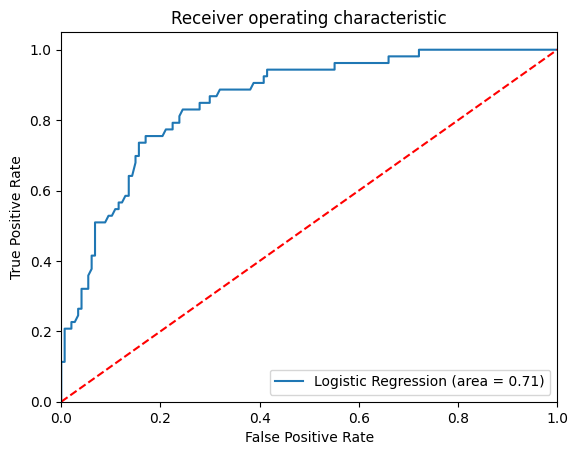

In [11]:
logit_roc_auc = roc_auc_score(y, lr.predict(x))
fpr, tpr, thresholds = roc_curve(y, lr.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()